# RFM Analaysis and clustering

The data set has been taken from https://www.kaggle.com/regivm/retailtransactiondata

The data contains 125000 transactions from May,2011 to March,2015 of 6889 customers.

variables:

1) customer_id: Unique ID of the customer

2) trans_date: Date of the particular transaction

3) tran_amount:The amount spent in the transaction 

we will be exploring the data and use it to do the recency, frequency and monetary(RFM) Analysis of the customers.
We will also use clustering algorithms to form customer segments. These customer segment can be targeted with different marketing campaigns depending on the characterstics of the customers in the cluster. 

Recency — How recently did the customer purchase?

Frequency — How often do they purchase?

Monetary Value — How much do they spend?


In [282]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime


In [283]:
data=pd.read_csv('Retail_Data_Transactions.csv')

In [284]:
data

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [286]:
data[data.duplicated()]

,customer_id,trans_date,tran_amount
14324,CS2700,23-Oct-11,48
59852,CS3458,11-Feb-15,40
77236,CS2761,03-Mar-14,75
91603,CS2565,14-Sep-12,67
105496,CS7782,30-Dec-14,70
121962,CS8394,14-Jul-13,16


Getting RFM values

In [287]:
data['trans_date']=pd.to_datetime(data['trans_date'])

In [288]:
data.drop_duplicates(inplace=True)

In [289]:
monetary=data.groupby(by='customer_id').sum()['tran_amount']

In [290]:
dates=data.groupby(by='customer_id').max()['trans_date']

In [291]:
frequency=data.groupby(by='customer_id').count()['trans_date']

In [292]:
dates=dates.apply(lambda x:datetime.date(x))

In [293]:
today=data['trans_date'].max()

In [294]:
today=datetime.date(today)

In [295]:
recency=dates.apply(lambda x:(today-x).days)

In [296]:
cust=pd.concat([frequency,monetary,recency],axis=1)

In [297]:
cust.columns=['frequency','monetary','recency']

In [298]:
cust.reset_index(inplace=True)

In [299]:
rfm=cust[['frequency','monetary','recency']]

In [345]:
rfm

,frequency,monetary,recency
0,15,1012,61
1,20,1490,35
2,19,1432,32
3,22,1659,11
4,13,857,203
...,...,...,...
6884,13,582,97
6885,14,543,261
6886,13,624,84
6887,12,383,257


## Scoring RFM using quartiles


In [241]:
rfm.quantile(0.25)

frequency     14.0
monetary     781.0
recency       22.0
klabels        1.0
Name: 0.25, dtype: float64

In [264]:
def scorer(x):
    quant=x.quantile([0.25,0.50,0.75])
    for i in range(len(x)):
        if x[i]<quant[0.25]:
            x[i]= 1
        elif x[i]>=quant[0.25] and x[i]<quant[0.50]:
            x[i]=2
        elif x[i]>=quant[0.50] and x[i]<quant[0.75]:
            x[i]=3
        else:
            x[i]=4
    return x
         

In [270]:
def scorer_mon_fre(x):
    quant=x.quantile([0.25,0.50,0.75])
    for i in range(len(x)):
        if x[i]<quant[0.25]:
            x[i]= 4
        elif x[i]>=quant[0.25] and x[i]<quant[0.50]:
            x[i]=3
        elif x[i]>=quant[0.50] and x[i]<quant[0.75]:
            x[i]=2
        else:
            x[i]=1
    return x       

In [271]:
rfm_score=pd.concat([scorer_mon_fre(rfm['frequency']),scorer_mon_fre(rfm['monetary']),scorer(rfm['recency'])],axis=1)

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\vivji\anaconda3\

In [272]:
rfm_score

,frequency,monetary,recency
0,3,3,3
1,1,2,2
2,1,2,2
3,1,1,1
4,4,3,4
...,...,...,...
6884,4,4,3
6885,3,4,4
6886,4,4,3
6887,4,4,4


#### recency- score 1=most  recent, score 4- least recent

#### monetary= score1= highest spender score 4= lowest spenders

#### frequency- score 1=highest frequency score 4= lowest frequency

##### Using these numbers a total of 64 segments can be made

In [277]:
rfm_score['customer']=frequency.reset_index()['customer_id']

In [280]:
rfm_score[(rfm_score['frequency']==1) & (rfm_score['recency']==1) & (rfm_score['monetary']==1)]

,frequency,monetary,recency,customer
3,1,1,1,CS1115
59,1,1,1,CS1171
86,1,1,1,CS1198
142,1,1,1,CS1254
171,1,1,1,CS1283
...,...,...,...,...
4872,1,1,1,CS5984
4884,1,1,1,CS5996
4923,1,1,1,CS6035
4944,1,1,1,CS6056


In [281]:
rfm_score[(rfm_score['frequency']==4) & (rfm_score['recency']==4) & (rfm_score['monetary']==4)]

,frequency,monetary,recency,customer
112,4,4,4,CS1224
127,4,4,4,CS1239
409,4,4,4,CS1521
418,4,4,4,CS1530
450,4,4,4,CS1562
...,...,...,...,...
6864,4,4,4,CS8976
6869,4,4,4,CS8981
6873,4,4,4,CS8985
6880,4,4,4,CS8992


In [302]:
rfm.quantile([0.25,0.50,0.75])

,frequency,monetary,recency
0.25,14.0,781.0,22.0
0.50,18.0,1227.0,53.0
0.75,22.0,1520.0,111.0


people with 1-1-1 rfm score have frequency of shopping more than 22 , spent a total of more than 1520 dollars and have shopped in last 22 days. we have 125 such customers

people with 4-4-4 rfm score have frequency of shopping less than 14, spent a total of less than 581 dollars and have not shopped since last 111 days.we have 486 such customers

64(4x4x4) customers segments could be very hard to analyze and target with different marketing campaign.

By using algorthms like clustering we can divide our customers in smaller groups  with more homogeneous characteristics.

# Dendrogram

In [216]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [217]:
Z=linkage(rfm,method='complete')

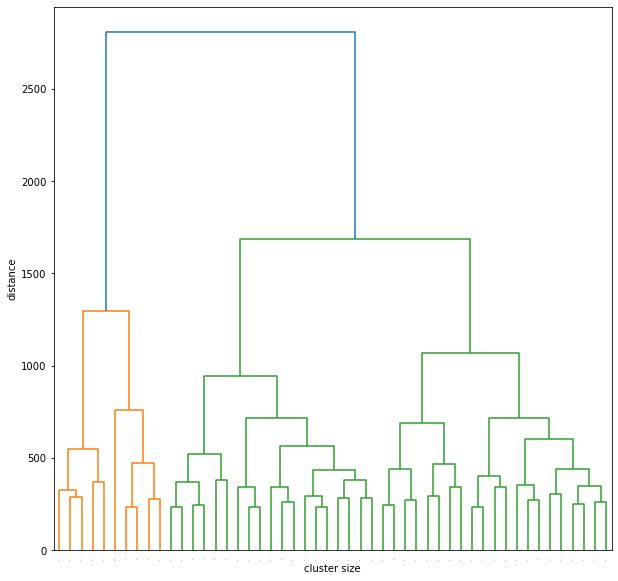

In [307]:
plt.figure(figsize=(10,10))
dendrogram(Z,leaf_rotation=90,leaf_font_size=0.5,p=50,truncate_mode='lastp')
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

# Agglomerative Clustering

In [309]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [310]:
from sklearn.metrics import silhouette_score

In [311]:
AL=AgglomerativeClustering(n_clusters=4,linkage='complete')

In [313]:
ac_rfm=rfm_score.drop('customer',axis=1)

In [315]:
AL.fit(ac_rfm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [316]:
ac_rfm['seg']=AL.labels_

In [317]:
ac_rfm.groupby('seg').mean()

,frequency,monetary,recency
seg,,,
0,3.459232,3.565701,2.740903
1,1.544374,1.447456,1.903453
2,1.538462,3.087607,2.455128
3,1.692105,1.681579,3.806579


# K mean Clustering

In [320]:
km_rfm=rfm_score.drop('customer',axis=1)

In [321]:
from sklearn.cluster import KMeans

In [322]:
KM=KMeans(n_clusters=4,n_init=40)

In [323]:
KM.fit(km_rfm)

KMeans(n_clusters=4, n_init=40)

In [325]:
#within group sse
KM.inertia_

6219.569200936997

### Selection K using intertias

In [326]:
inertias = []
for i in [2,3,4,5,6,7]:
    km=KMeans(n_clusters=i,n_init=40)
    inertia=km.fit(km_rfm).inertia_
    print(inertia)
    inertias.append(inertia)

12859.94571555665
9362.811678746843
6219.569200936997
5342.928823935793
4566.992678408395
3998.9061218282172


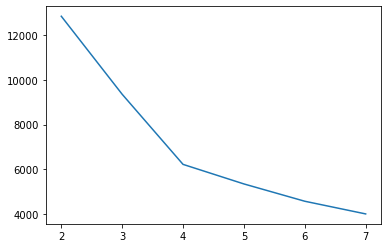

In [327]:
sns.lineplot([2,3,4,5,6,7],inertias)

### Silhouette Score

In [329]:
sill = []
for i in [2,3,4,5,6,7]:
    km=KMeans(n_clusters=i,n_init=40)
    km.fit(km_rfm)
    score=silhouette_score(km_rfm,km.labels_)
    print(score)
    sill.append(score)

0.443663058729267
0.3992145600070998
0.44000694989585565
0.4309123017771609
0.4230878431303185
0.434049173556115


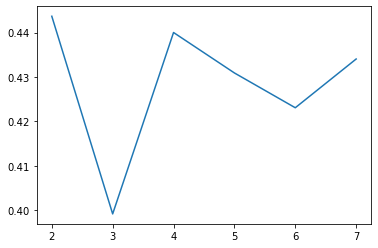

In [391]:
sns.lineplot([2,3,4,5,6,7],sill)

Using the elbow method for intertia I have chosen k as 4 here. 

The result match with the silhouette score we have gotten for different values of K.

In [330]:
km_rfm['klabels']=KM.labels_

In [331]:
km_rfm.groupby('klabels').mean()

,frequency,monetary,recency
klabels,,,
0,1.496729,1.521892,1.487167
1,3.242232,3.406780,1.508475
2,1.565928,1.735123,3.414236
3,3.489278,3.601580,3.589165


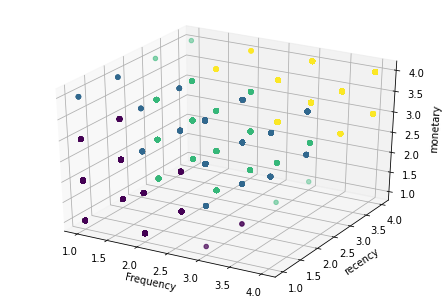

In [378]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('Frequency')
ax.set_ylabel('recency')
ax.set_zlabel('monetary')

ax.scatter(km_rfm['frequency'],km_rfm['recency'],km_rfm['monetary'],c=km_rfm['klabels'],marker='o')


# Segment wise analysis

## Segment 0:High valued customer

In [388]:
km_rfm.columns=['f_score', 'm_score', 'r_score', 'klabels']

In [389]:
seg=pd.concat([km_rfm,cust],axis=1)

In [411]:
seg[seg['klabels']==0].mean()

f_score         1.496729
m_score         1.521892
r_score         1.487167
klabels         0.000000
frequency      22.495722
monetary     1564.725214
recency        22.374937
dtype: float64

Customer in segment zero have average frequency of 22.49, monetary of 1564.72 dollars and recency of 22.27 days

the rfm scores 1,1,1 are the best possible scores and these 1987 customers are the our highest valued customers

## Segment 1: New customers

In [408]:
seg[seg['klabels']==1].mean()

f_score        3.242232
m_score        3.406780
r_score        1.508475
klabels        1.000000
frequency     14.346045
monetary     833.457627
recency       23.565678
dtype: float64

These 1416 customers score high on recency and low on frequency and monetary values. These are our new customers

on an average they have vissited the store in last 23.5 days

## Segment 2: Good lost customers

In [409]:
seg[seg['klabels']==2].mean()

f_score         1.565928
m_score         1.735123
r_score         3.414236
klabels         2.000000
frequency      21.385648
monetary     1478.287631
recency       114.624854
dtype: float64

These 1714 customers core good on frequency and monetary but bad on recency. These were the customers who shopped often and spent a lot but have stooped shopping from us. the have not shooped from us within the last 114.6 days on an average

## Segment 3: Low valued customers 


In [410]:
seg[seg['klabels']==3].mean()

f_score        3.489278
m_score        3.601580
r_score        3.589165
klabels        3.000000
frequency     13.163657
monetary     733.974605
recency      158.314334
dtype: float64

These 1772 customers score low on all three r,f and m scores. 

they have shopped only 13.16 times from us,have spent only 733.97 dollars and have not shopped within last 158.31 on an average